In [48]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [49]:
datap1 = np.genfromtxt(f'/home/sudat/cca/single/disk.hst')
data2p1 = athena_read.athdf(f'/home/sudat/cca/single/disk.out1.00800.athdf')
timep1 = datap1[:,0] / (2*np.pi)
sum_torquep1 = datap1[:,10]

densp1 = data2p1.get('dens')[0]
rp1 = data2p1.get('x1v')
phip1 = data2p1.get('x2v')
time2p1 = data2p1.get('Time')
phip1_c = data2p1.get('x2f')
rp1_c = data2p1.get('x1f')

phip1 = phip1[:,None]
d_phip1 = phip1_c[:, None]
d_phip1 = d_phip1[1:] - d_phip1[:-1]
d_rp1 = rp1_c[1:] - rp1_c[:-1]

In [50]:
data = np.genfromtxt('/home/sudat/cca/seawulf_3:2/disk.hst')
data2 = athena_read.athdf('/home/sudat/cca/seawulf_3:2/disk.out1.00740.athdf')
time = data[:,0] / (2*np.pi)
sum_torque = data[:,10]
sum_torque2 = data[:,11]

dens = data2.get('dens')[0]
r = data2.get('x1v')
phi = data2.get('x2v')
time2 = data2.get('Time')
phi_c= data2.get('x2f')
r_c = data2.get('x1f')

phi = phi[:,None]
d_phi = phi_c[:, None]
d_phi = d_phi[1:] - d_phi[:-1]
d_r = r_c[1:] - r_c[:-1]

In [51]:
'''Conversion from Polar -> Cartesian'''
xp1 = rp1_c[None,:] * np.cos(phip1_c[:,None])
yp1 = rp1_c[None,:] * np.sin(phip1_c[:, None])

In [52]:
'''Conversion from Polar -> Cartesian'''
x = r_c[None,:] * np.cos(phi_c[:,None])
y = r_c[None,:] * np.sin(phi_c[:, None])

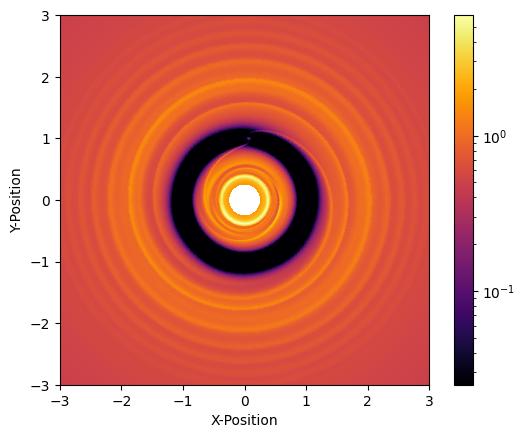

In [53]:
plt.pcolormesh(xp1, yp1, (densp1), cmap='inferno', norm='log', vmin=0.025)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.axis('square')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.colorbar()

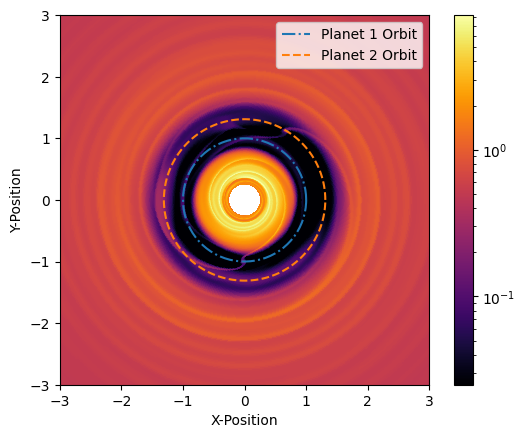

In [54]:
plt.pcolormesh(x, y, (dens), cmap='inferno', norm='log', vmin=0.025)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.axis('square')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.colorbar()

theta = np.linspace( 0 , 2 * np.pi , 150 )
a1 = 1 * np.cos( theta )
b1 = 1 * np.sin( theta )
a2 = np.cbrt(2.25) * np.cos(theta)
b2 = np.cbrt(2.25) * np.sin(theta)
 
plt.plot(a1,b1, linestyle='-.', label = 'Planet 1 Orbit')
plt.plot(a2,b2, linestyle='dashed', label='Planet 2 Orbit')
plt.legend()

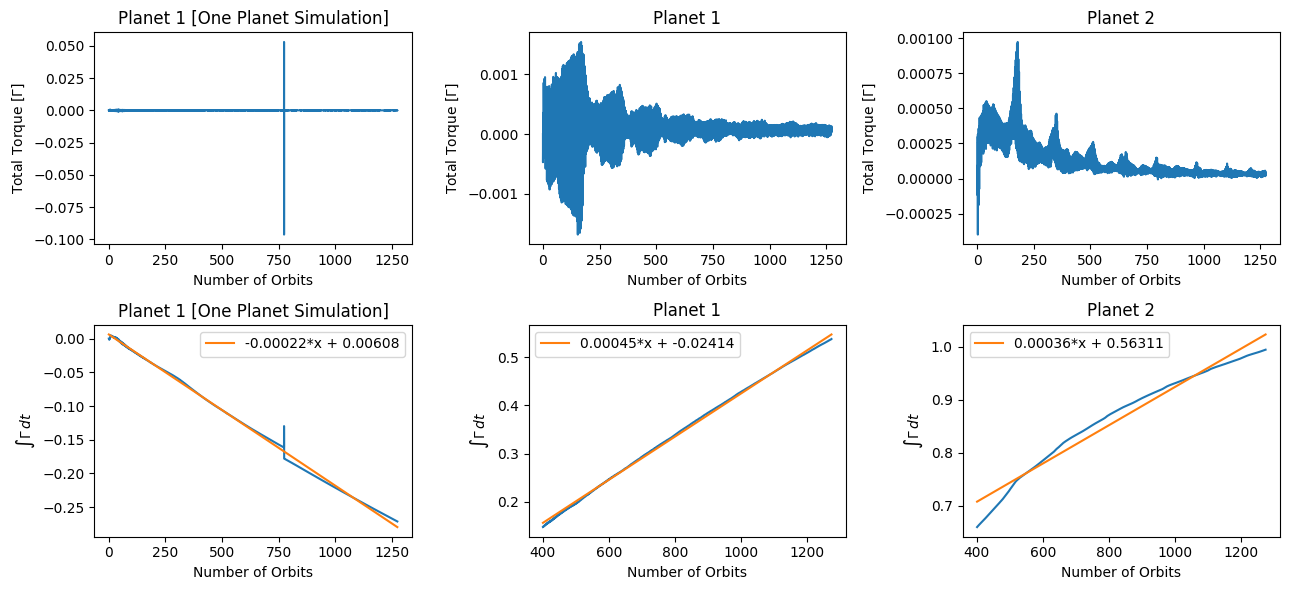

In [55]:
plt.figure(figsize=(13,6))

plt.subplot(231)
plt.plot(timep1, sum_torquep1)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1 [One Planet Simulation]')

plt.subplot(232)
plt.plot(time, sum_torque)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1')

plt.subplot(233)
plt.plot(time, sum_torque2)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 2')

plt.subplot(234)
torque_integralp1 = np.cumsum(sum_torquep1 * 0.5)
plt.plot(timep1, torque_integralp1)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1 [One Planet Simulation]')
m,b = np.polyfit(timep1, torque_integralp1, deg=1)
plt.plot(timep1, m*(timep1)+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

plt.subplot(235)
torque_integral = np.cumsum(sum_torque * 0.5)
plt.plot(time[5042:-1], torque_integral[5042:-1])
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1')
m,b = np.polyfit(time[5042:-1], torque_integral[5042:-1], deg=1)
plt.plot(time[5042:-1], m*(time[5042:-1])+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

plt.subplot(236)
torque_integral2 = np.cumsum(sum_torque2 * 0.5)
plt.plot(time[5042:-1], torque_integral2[5042:-1])
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 2')
m2,b2 = np.polyfit(time[5042:-1], torque_integral2[5042:-1], deg=1)
plt.plot(time[5042:-1], m2*(time[5042:-1])+b2, label=f'{np.round(m2,5)}*x + {np.round(b2,5)}')
plt.legend()

plt.tight_layout()

Total Torque:
$$\Gamma = \iint_{S} \vec{r} \times \vec{g} \, dm \Rightarrow \iint_{S} \Sigma (r, \phi) |\vec{r}| |\vec{g}| \sin\theta \, dA \Rightarrow \iint_{S} \Sigma (r, \phi) r^2 |\vec{g}| \sin\theta \, dr d\phi$$
$$\Gamma_{\Sigma} = \Sigma (r, \phi) |\vec{g}| \sin\theta$$

Torque per unit radius:
$$\frac{\partial \Gamma}{\partial r} = r^2 \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi \Rightarrow r^2 \int \Gamma_{\Sigma} \, d\phi$$

$$\Gamma = \int \frac{\partial \Gamma}{\partial r} \, dr$$

In [56]:
def initial(r, phi, time2, rp, gm_planet):
    epsilon = 0.3
    gm0 = 1.0
    R_H = rp*np.cbrt(gm_planet/(3*gm0))
    period = 2*np.pi* np.sqrt(rp**3 / gm0)
    phip = 2 * (np.pi / period) * time2
    d = np.sqrt(pow(rp,2) + pow(r,2) - 2*rp*r*np.cos(phi - phip))
    g_mag = -1*((gm_planet*d) / (np.sqrt(pow(pow(d,2) + pow(epsilon,2)*pow(R_H,2), 3))))
    sine_term = (r*rp*np.cos(phi)*np.sin(phip) - r*rp*np.sin(phi)*np.cos(phip)) / (r*d)
    return g_mag, sine_term, d, R_H

In [57]:
'''Planet 1 One-Planet Simulation'''
sum_r_torque = 0
torque_dm = 0
for i in range(600,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/single/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
    sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
    #d = initial(r, phi, time2, 1, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avgp1 = sum_r_torque/len(range(600,800,5))

In [58]:
'''Planet 1 Two-Planet Simulation'''
sum_r_torque = 0
for i in range(600,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/seawulf_3:2/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
    sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
    #d = initial(r, phi, time2, 1, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p1 = sum_r_torque/len(range(600,800,5))

In [59]:
'''Planet 2'''
sum_r_torque = 0
for i in range(600,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/seawulf_3:2/disk.out1.00{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, np.cbrt(2.25), 0.000285716656)[0]
    sine_term = initial(r, phi, time2, np.cbrt(2.25), 0.000285716656)[1]
    #d = initial(r, phi, time2, 1.5, 0.000954588)[2]
    #dens[d<0.5*initial(r, phi, time2, 1.5, 0.000954588)[3]] = 0
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p2 = sum_r_torque / len(range(600,800,5))

$$\frac{\partial \Gamma_{\nu}}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$$

In [60]:
GM = 1.0
keplerian_vel = np.sqrt(GM / r**3)
nu = 0.001 * (0.05*r)**2 * keplerian_vel
density_initial = (r)**(-1/2)
viscous_torque = 3 * np.pi * nu * density_initial * r**2 * keplerian_vel

In [61]:
sum_dens_onesim = 0
for i in range(600,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/single/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    #density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.25
    sum_dens_onesim += density

sum_dens_avg_onesim = sum_dens_onesim/len(range(600,800,5))

In [62]:
sum_dens = 0
for i in range(600,800,5):
    data = athena_read.athdf(f'/home/sudat/cca/seawulf_3:2/disk.out1.00{i}.athdf')
    density = data.get('dens')[0]
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.5, 0.000954588)[3]] = 0.004
    #d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    #density[d < 1.0 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.004
    sum_dens += density

sum_dens_avg = sum_dens/len(range(600,800,5))

Normalization Factor for Planet-Disk Torque:
$$\Gamma_{0} = \Sigma \,r_{p}^4 \,\Omega_{p}^2 \,q^2 \,(\frac{c_{s}}{\nu_{0}})^{-2} $$

In [63]:
def norm(a,q):
    density_initial = (r)**(-1/2)
    GM = 1.0
    keplerian_vel = np.sqrt(GM / a**3)
    sound_speed = (0.05*r) * keplerian_vel
    nu = 0.001 * (0.05*r)**2 * keplerian_vel
    normed_torque = density_initial * a**4 * keplerian_vel**2 * q**2 * (sound_speed/nu)**(-2)
    return normed_torque

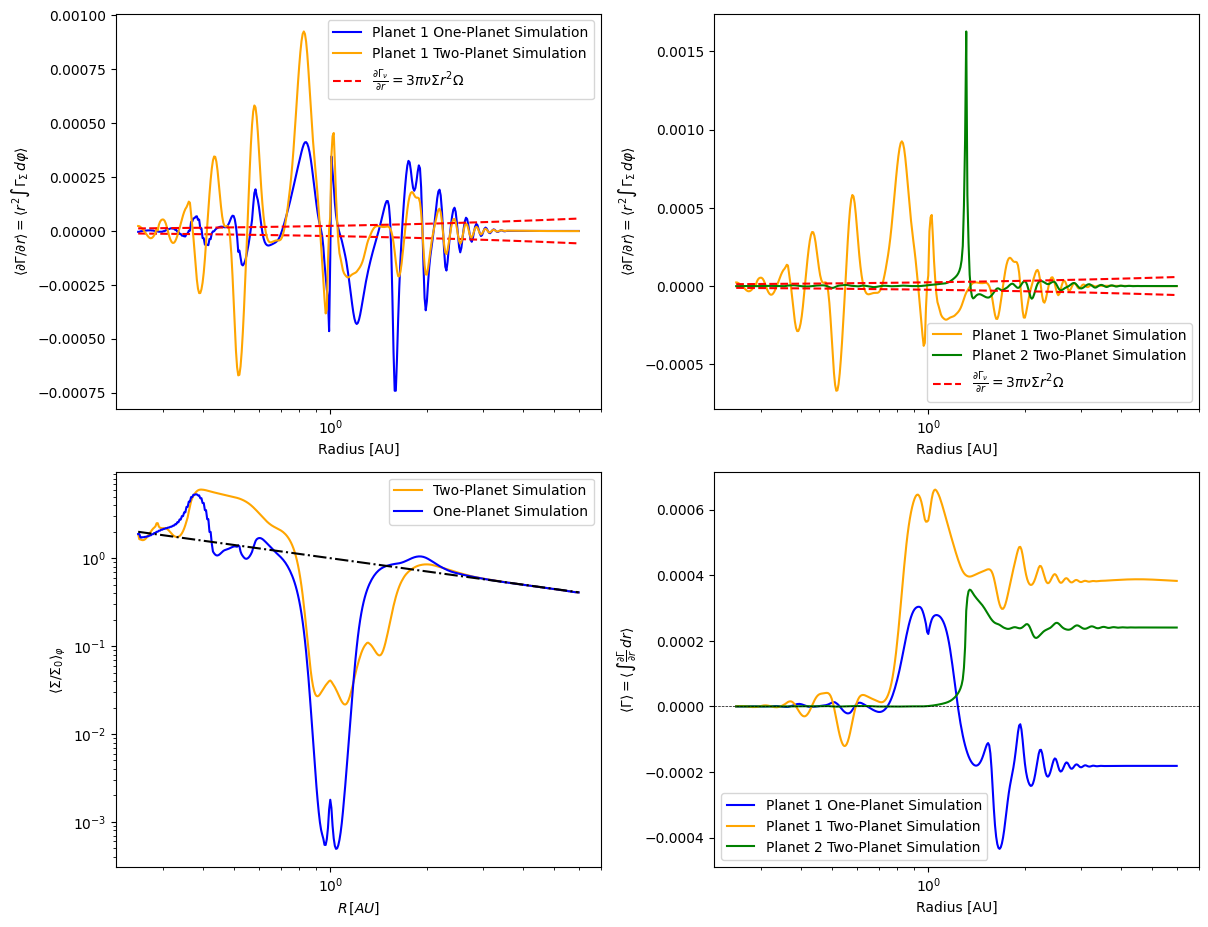

In [71]:
plt.figure(figsize=(9.75*1.25,7.5*1.25))

plt.subplot(221)
plt.plot(rp1, (r_torque_avgp1), label= 'Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.xlabel('Radius [AU]')
plt.xscale('log')

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(222)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel('Radius [AU]')
plt.xscale('log')

plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(223)
plt.plot(r, np.average(sum_dens_avg, axis = 0), label = 'Two-Planet Simulation', color='orange')
plt.plot(rp1, np.average(sum_dens_avg_onesim, axis = 0), label= 'One-Planet Simulation', color='blue')
plt.plot(r, (r)**(-1/2), linestyle= '-.', c='black')
#plt.text(5, 0.335, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'$R \,[AU]$')

plt.legend()

plt.subplot(224)   
plt.plot(rp1, 2*np.pi*(np.cumsum(r_torque_avgp1 * d_rp1)), label='Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, 2*np.pi*(np.cumsum(r_torque_avg_p1 * d_r)), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, 2*np.pi*(np.cumsum(r_torque_avg_p2* d_r)), label='Planet 2 Two-Planet Simulation', color='green')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.xlabel('Radius [AU]')
plt.xscale('log')

plt.legend()

plt.tight_layout()

Co-Orbital Horseshoe Region width:
$$x = C(\varepsilon) a_p \sqrt{\frac{q}{h}}$$